# 치킨 메뉴만 가지고 테스트 해보기

In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
df = pd.read_csv("/Users/yujinkim/Desktop/3학년/1학기/응용머신러닝/Final Project/한식_05월.csv",encoding = 'utf-8')
df 

,Unnamed: 0,date,hour,city,time
0,0,2020-05-01,0,구로구,22.01
1,1,2020-05-01,0,금천구,16.45
2,2,2020-05-01,0,동작구,26.35
3,3,2020-05-01,0,영등포구,20.37
4,4,2020-05-01,0,은평구,21.76
...,...,...,...,...,...
2917,2917,2020-05-31,23,금천구,17.93
2918,2918,2020-05-31,23,도봉구,20.15
2919,2919,2020-05-31,23,동작구,22.21
2920,2920,2020-05-31,23,영등포구,29.67


In [89]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,date,hour,city,time
0,2020-05-01,0,구로구,22.01
1,2020-05-01,0,금천구,16.45
2,2020-05-01,0,동작구,26.35
3,2020-05-01,0,영등포구,20.37
4,2020-05-01,0,은평구,21.76
...,...,...,...,...
2917,2020-05-31,23,금천구,17.93
2918,2020-05-31,23,도봉구,20.15
2919,2020-05-31,23,동작구,22.21
2920,2020-05-31,23,영등포구,29.67


([<matplotlib.axis.XTick at 0x15899cc10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

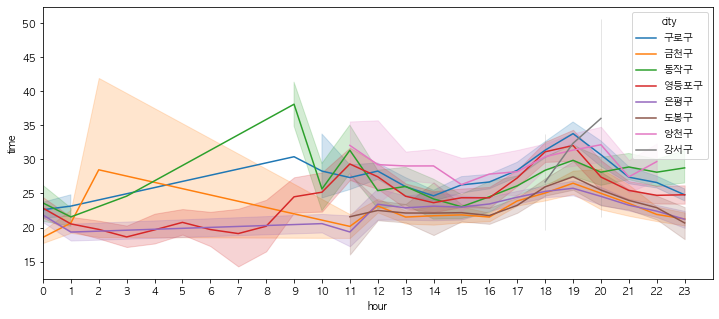

In [90]:
from matplotlib import font_manager, rc
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

plt.figure(figsize =(12, 5))
sns.lineplot(x='hour', y='time', hue='city', data=df)
plt.xlim(0,24)
plt.xticks(range(0,24))

In [91]:
index=[]
index = df[df['city'] == "동작구"].index

guro=df.iloc[index,:]
guro

,date,hour,city,time
2,2020-05-01,0,동작구,26.35
18,2020-05-01,10,동작구,28.64
23,2020-05-01,11,동작구,34.23
29,2020-05-01,12,동작구,23.26
35,2020-05-01,13,동작구,32.64
...,...,...,...,...
2892,2020-05-31,19,동작구,25.20
2898,2020-05-31,20,동작구,21.72
2905,2020-05-31,21,동작구,29.08
2912,2020-05-31,22,동작구,27.71


<AxesSubplot:xlabel='hour', ylabel='time'>

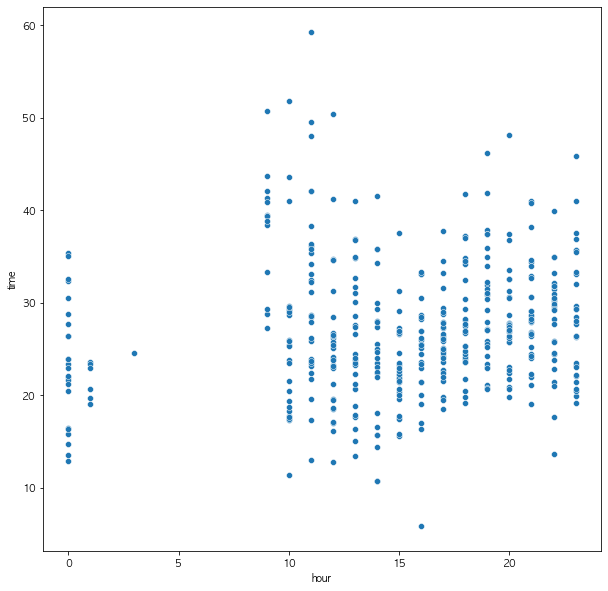

In [92]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='hour', y='time', data=guro)

In [93]:
#Mapping ordinal features
city_mapping = {
    '영등포구': 10,
    '동작구': 11,
    '구로구': 12,
    '은평구': 13,
    '금천구': 14,
    '도봉구': 15,
    '양천구':16
}
df['city'] = df['city'].map(city_mapping)
df

,date,hour,city,time
0,2020-05-01,0,12.0,22.01
1,2020-05-01,0,14.0,16.45
2,2020-05-01,0,11.0,26.35
3,2020-05-01,0,10.0,20.37
4,2020-05-01,0,13.0,21.76
...,...,...,...,...
2917,2020-05-31,23,14.0,17.93
2918,2020-05-31,23,15.0,20.15
2919,2020-05-31,23,11.0,22.21
2920,2020-05-31,23,10.0,29.67


In [94]:
#월요일(1), 화(2), 수(3), 목(4), 금(5), 토(6), 일(7) mapping 시키기

date_mapping = {
    '2020-05-04':1, '2020-05-11':1,'2020-05-25': 1,
    '2020-05-05':2,'2020-05-19':2,'2020-05-26':2,'2020-05-12': 2,
    '2020-05-20':3,'2020-05-13':3,'2020-05-06':3,'2020-05-27': 3,
    '2020-05-21':4,'2020-05-07':4,'2020-05-28':4,'2020-05-14': 4,
    '2020-05-15':5,'2020-05-01':5,'2020-05-22':5,'2020-05-08': 5,
    '2020-05-09':6,'2020-05-23':6,'2020-05-02':6,'2020-05-16':6,'2020-05-30':6,'2020-05-29': 6,
    '2020-05-03':7,'2020-05-10':7,'2020-05-17':7,'2020-05-24':7,'2020-05-31': 7
}
df['date'] = df['date'].map(date_mapping)
df

,date,hour,city,time
0,5,0,12.0,22.01
1,5,0,14.0,16.45
2,5,0,11.0,26.35
3,5,0,10.0,20.37
4,5,0,13.0,21.76
...,...,...,...,...
2917,7,23,14.0,17.93
2918,7,23,15.0,20.15
2919,7,23,11.0,22.21
2920,7,23,10.0,29.67


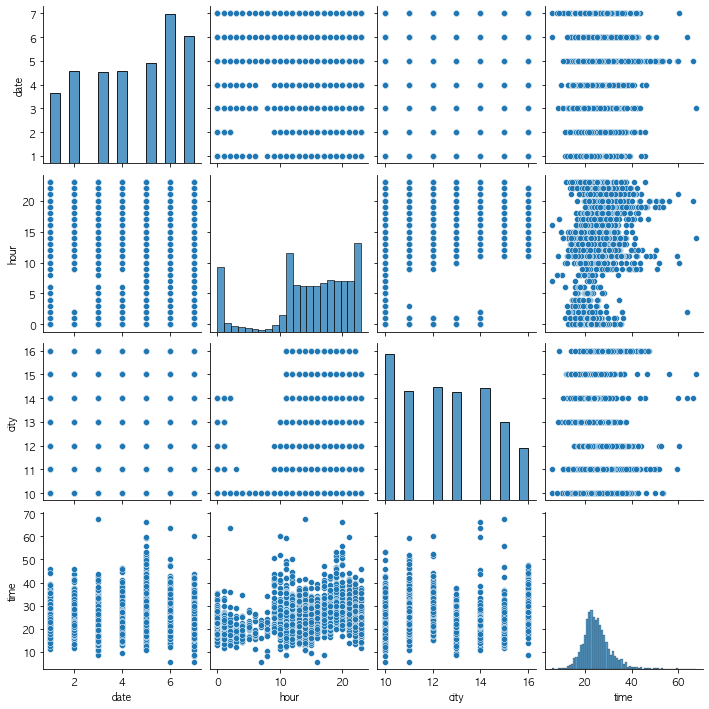

In [95]:
from pandas.plotting import scatter_matrix

sns.pairplot(data = df)

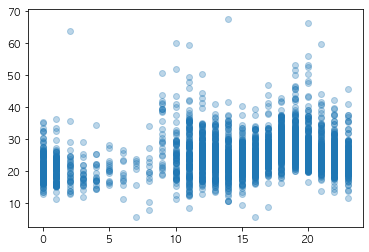

In [96]:
#그나마 분포를 확인할 수 있는게 주문시간 - 배달소요시간

plt.scatter(x='hour', y='time', data=df, alpha =0.3)

In [97]:
#데이터 학습/평가데이터로 분할
featureColums = list(df.columns.difference(["time"]))
x = df[featureColums]
y = df.time

In [98]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,train_size=0.7,test_size=0.3, random_state = 3)

In [99]:
train_X

,city,date,hour
1271,14.0,4,1
1141,15.0,2,19
2816,10.0,6,23
2770,16.0,6,16
1547,12.0,6,21
...,...,...,...
2304,10.0,1,16
968,10.0,7,21
1667,12.0,2,0
1688,13.0,2,12


In [100]:
train_X.shape

(2045, 3)

In [101]:
test_X.shape

(877, 3)

In [102]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

(0.0, 60.0)

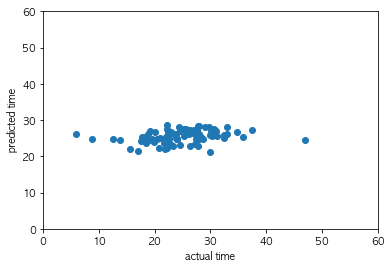

In [29]:
plt.scatter(test_Y, predY)
plt.xlabel("actual time")
plt.ylabel("predicted time")
plt.xlim(0,60)
plt.ylim(0,60)

In [30]:
model.score(train_X, train_Y)

0.09345881824533386

# 치킨 polynomial regression

In [124]:
#pair plot 유의미한 분포가 hour - time이므로 두개로 진행한다.
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [113]:
X = df[['hour']]
Y = df[['time']]

In [149]:
X

,hour
0,0
1,0
2,0
3,0
4,0
...,...
2917,23
2918,23
2919,23
2920,23


In [114]:
from sklearn.preprocessing import PolynomialFeatures
quad= PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

In [115]:
X_quad = quad.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [116]:
lr = LinearRegression()
X_fit = np.arange(0, 24).reshape(-1,1)

In [117]:
lr = lr.fit(X, Y)
y_lin_fit = lr.predict(X_fit)
y_lin_pred = lr.predict(X)

In [118]:
lr = lr.fit(X_quad, Y)
y_quad_fit = lr.predict(quad.fit_transform(X_fit))
y_quad_pred = lr.predict(X_quad)

In [119]:
lr = lr.fit(X_cubic, Y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
y_cubic_pred = lr.predict(X_cubic)

MSE	 Linear: 35.20, 	Quadratic: 34.88, 	Cubic: 34.49
R2	 Linear: 0.05, 	Quadratic: 0.06, 	Cubic: 0.07


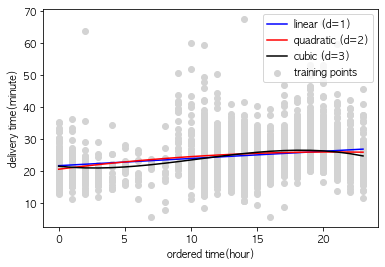

In [125]:
plt.scatter(X, Y, label="training points", color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1)', color='blue', linestyle='-')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2)', color='red', linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3)', color='black', linestyle='-')
plt.xlabel('ordered time(hour)')
plt.ylabel('delivery time(minute)')
plt.legend(loc='upper right')


#MSE와 결졍계수(R2)
mse_lin = mean_squared_error(Y, y_lin_pred)
mse_quad = mean_squared_error(Y, y_quad_pred)
mse_cubic = mean_squared_error(Y, y_cubic_pred)
r2_lin = r2_score(Y, y_lin_pred)
r2_quad = r2_score(Y, y_quad_pred)
r2_cubic = r2_score(Y, y_cubic_pred)

print("MSE\t Linear: %.2f, \tQuadratic: %.2f, \tCubic: %.2f" %(mse_lin, mse_quad, mse_cubic))
print("R2\t Linear: %.2f, \tQuadratic: %.2f, \tCubic: %.2f" %(r2_lin, r2_quad, r2_cubic))

# outlier 제거 

<AxesSubplot:>

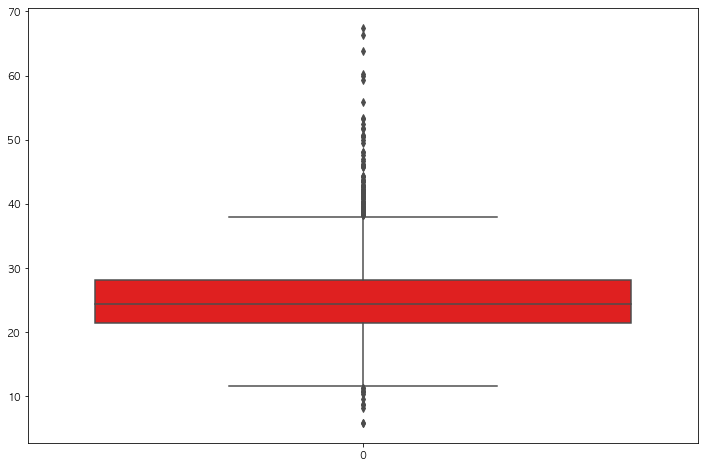

In [126]:
#배달 소요시간 outlier
plt.figure(figsize=(12,8))
sns.boxplot(data=df['time'], color = 'red')

In [127]:
def outlier_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [128]:
time_outlier_index = outlier_iqr(df['time'])[0]
time_outlier_index

array([ 117,  124,  129,  222,  225,  324,  400,  413,  438,  515,  535,
        616,  700,  701,  705,  709,  745,  747,  749,  750,  751,  752,
        753,  754,  756,  757,  758,  759,  760,  761,  762,  764,  765,
        767,  768,  793,  800,  835,  842,  849,  897,  899,  910,  997,
       1185, 1251, 1304, 1327, 1354, 1379, 1428, 1429, 1433, 1435, 1436,
       1440, 1445, 1452, 1481, 1577, 1578, 1579, 1656, 1717, 1730, 1776,
       1781, 1785, 1790, 1809, 1912, 1968, 1986, 2006, 2021, 2027, 2063,
       2069, 2102, 2124, 2132, 2138, 2165, 2190, 2267, 2323, 2360, 2542,
       2588, 2598, 2667, 2763, 2777, 2831, 2879, 2913])

In [129]:
df.loc[time_outlier_index, 'time']

117     41.27
124     38.29
129     50.39
222     40.94
225     43.62
        ...  
2763    40.38
2777    46.96
2831    42.11
2879     8.75
2913    39.43
Name: time, Length: 96, dtype: float64

In [130]:
not_outlier_index = []

for i in df.index:
    if i not in time_outlier_index:
        not_outlier_index.append(i)

In [131]:
del_outlier_df = df.loc[not_outlier_index]
del_outlier_df = del_outlier_df.reset_index(drop = True)
del_outlier_df

,date,hour,city,time
0,5,0,12.0,22.01
1,5,0,14.0,16.45
2,5,0,11.0,26.35
3,5,0,10.0,20.37
4,5,0,13.0,21.76
...,...,...,...,...
2821,7,23,14.0,17.93
2822,7,23,15.0,20.15
2823,7,23,11.0,22.21
2824,7,23,10.0,29.67


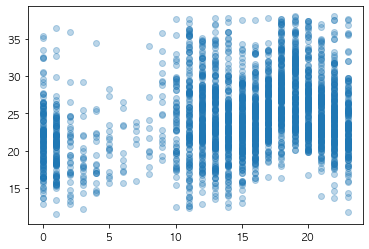

In [132]:
plt.scatter(x='hour', y='time', data=del_outlier_df, alpha =0.3)

MSE	 Linear: 22.81, 	Quadratic: 22.56, 	Cubic: 22.01
R2	 Linear: 0.07, 	Quadratic: 0.08, 	Cubic: 0.10


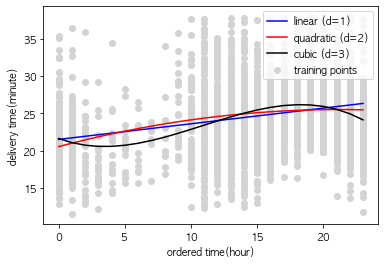

In [145]:
X = del_outlier_df[['hour']]
Y = del_outlier_df[['time']]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


quad= PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quad.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#단순회귀 계산
lr = LinearRegression()
X_fit = np.arange(0, 24).reshape(-1,1)
lr = lr.fit(X, Y)
y_lin_fit = lr.predict(X_fit)
y_lin_pred = lr.predict(X)

#다항회귀 모델
lr = lr.fit(X_quad, Y)
y_quad_fit = lr.predict(quad.fit_transform(X_fit))
y_quad_pred = lr.predict(X_quad)

lr = lr.fit(X_cubic, Y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
y_cubic_pred = lr.predict(X_cubic)


plt.scatter(X, Y, label="training points", color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1)', color='blue', linestyle='-')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2)', color='red', linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3)', color='black', linestyle='-')
plt.xlabel('ordered time(hour)')
plt.ylabel('delivery time(minute)')
plt.legend(loc='upper right')

#MSE와 결졍계수 (R2
mse_lin = mean_squared_error(Y, y_lin_pred)
mse_quad = mean_squared_error(Y, y_quad_pred)
mse_cubic = mean_squared_error(Y, y_cubic_pred)

r2_lin = r2_score(Y, y_lin_pred)
r2_quad = r2_score(Y, y_quad_pred)
r2_cubic = r2_score(Y, y_cubic_pred)

print("MSE\t Linear: %.2f, \tQuadratic: %.2f, \tCubic: %.2f" %(mse_lin, mse_quad, mse_cubic))
print("R2\t Linear: %.2f, \tQuadratic: %.2f, \tCubic: %.2f" %(r2_lin, r2_quad, r2_cubic))

In [166]:
y_cubic_pred

array([[21.60582516],
       [21.60582516],
       [21.60582516],
       ...,
       [24.1073512 ],
       [24.1073512 ],
       [24.1073512 ]])

In [164]:
lr = LinearRegression()
lr = lr.fit(X_cubic, Y)

hour = [[i for i in range(0,24)]]
X_quad = quad.fit_transform(hour)

In [165]:
y_cubic_pred = lr.predict(X_quad)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 325)

MSE	 Linear: 22.81, 	Quadratic: 22.56, 	Cubic: 22.01
R2	 Linear: 0.07, 	Quadratic: 0.08, 	Cubic: 0.10


# Clustering 시도

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
df

,date,hour,city,time
0,2020-05-01,0,구로구,22.01
1,2020-05-01,0,금천구,16.45
2,2020-05-01,0,동작구,26.35
3,2020-05-01,0,영등포구,20.37
4,2020-05-01,0,은평구,21.76
...,...,...,...,...
2917,2020-05-31,23,금천구,17.93
2918,2020-05-31,23,도봉구,20.15
2919,2020-05-31,23,동작구,22.21
2920,2020-05-31,23,영등포구,29.67


In [16]:
encoding = df.copy()

In [17]:
#Mapping ordinal features
city_mapping = {
    '구로구': 0,
    '영등포구': 1,
    '동작구': 2,
    '구로구': 3,
    '은평구': 4,
    '금천구': 5,
    '도봉구': 6,
    '양천구':7,
    '관악구': 8,
    '노원구': 9,
    '강남구': 10,
    '강동구': 11,
    '서초구': 12,
    '서대문구': 13,
    '강서구': 14
}
encoding['city'] = encoding['city'].map(city_mapping)

#월요일(1), 화(2), 수(3), 목(4), 금(5), 토(6), 일(7) mapping 시키기

date_mapping = {
    '2020-05-04':1, '2020-05-11':1,'2020-05-25': 1,
    '2020-05-05':2,'2020-05-19':2,'2020-05-26':2,'2020-05-12': 2,
    '2020-05-20':3,'2020-05-13':3,'2020-05-06':3,'2020-05-27': 3,
    '2020-05-21':4,'2020-05-07':4,'2020-05-28':4,'2020-05-14': 4,
    '2020-05-15':5,'2020-05-01':5,'2020-05-22':5,'2020-05-08': 5,
    '2020-05-09':6,'2020-05-23':6,'2020-05-02':6,'2020-05-16':6,'2020-05-30':6,'2020-05-29': 6,
    '2020-05-03':7,'2020-05-10':7,'2020-05-17':7,'2020-05-24':7,'2020-05-31': 7
}
encoding['date'] = encoding['date'].map(date_mapping)

encoding

,date,hour,city,time
0,5,0,3,22.01
1,5,0,5,16.45
2,5,0,2,26.35
3,5,0,1,20.37
4,5,0,4,21.76
...,...,...,...,...
2917,7,23,5,17.93
2918,7,23,6,20.15
2919,7,23,2,22.21
2920,7,23,1,29.67


In [23]:
X = encoding.drop(['time'], axis =1)
Y = encoding['time']

In [25]:
k_range = range(1,11)

In [26]:
k_means_models = [KMeans(n_clusters=k, random_state=1).fit(X) for k in k_range]

In [27]:
centroids = [one_model.cluster_centers_ for one_model in k_means_models]

In [28]:
centroids

[array([[ 4.40691307, 14.8963039 ,  3.53935661]]),
 array([[ 4.39076801, 16.97652209,  3.71627537],
        [ 4.50611247,  2.11491443,  2.45232274]]),
 array([[ 4.36731743, 19.90455531,  3.85683297],
        [ 4.49051491,  1.40108401,  2.56639566],
        [ 4.42735043, 13.23247863,  3.47094017]]),
 array([[ 4.45121951, 11.96341463,  3.10569106],
        [ 4.46132597,  1.29281768,  2.59668508],
        [ 4.35794872, 20.90358974,  3.80615385],
        [ 4.40141677, 16.35064935,  4.01298701]]),
 array([[ 4.49449204, 21.24479804,  3.67197062],
        [ 4.48914616, 11.85383502,  3.02315485],
        [ 2.24793388, 16.81818182,  3.71280992],
        [ 4.46132597,  1.29281768,  2.59668508],
        [ 5.98591549, 16.49823944,  4.42957746]]),
 array([[ 5.69125214, 16.72041166,  4.41509434],
        [ 4.46132597,  1.29281768,  2.59668508],
        [ 2.32087912, 13.39120879,  3.54065934],
        [ 5.65719697, 21.34848485,  3.58333333],
        [ 5.78678038, 11.83795309,  2.90405117],
        [ 

In [29]:
#유클리드 거리 계산
k_euclid =[cdist(X, cent, 'euclidean') for cent in centroids]

In [32]:
dist = [np.min(ke, axis=1) for ke in k_euclid]

In [33]:
len(dist)

10

In [34]:
len(dist[1])

2922

In [35]:
dist[1]

array([2.23980765, 3.34775258, 2.21841921, ..., 6.78498187, 7.10412061,
       6.57045489])

In [36]:
wcss = [sum(d**2) for d in dist]

In [37]:
len(wcss)

10

In [41]:
k_means_2 = KMeans(n_clusters=2, random_state=1).fit(X)
k_means_3 = KMeans(n_clusters=3, random_state=1).fit(X)
k_means_4 = KMeans(n_clusters=4, random_state=1).fit(X)

In [42]:
k_means_2.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [43]:
k_means_3.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [44]:
metrics.silhouette_score(X, k_means_2.labels_, metric='euclidean')

0.5923797099384809

In [45]:
metrics.silhouette_score(X, k_means_3.labels_, metric='euclidean')

0.4304887951460405

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaled_encoding = pd.DataFrame(scaler.fit_transform(encoding), columns = encoding.columns)

In [50]:
# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는 지 시각화
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')


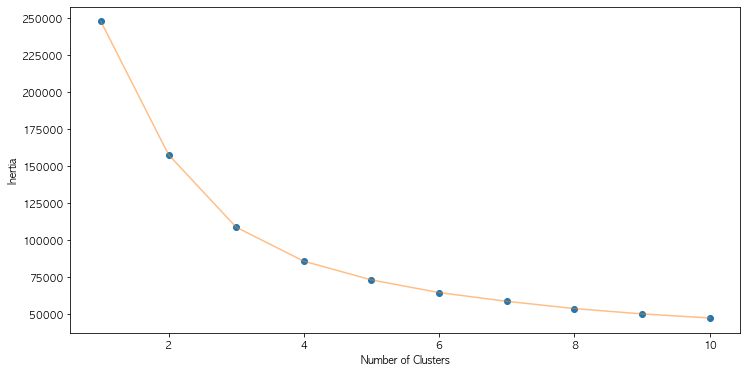

In [52]:
#스케일링 전 
change_n_clusters(k_range, encoding)

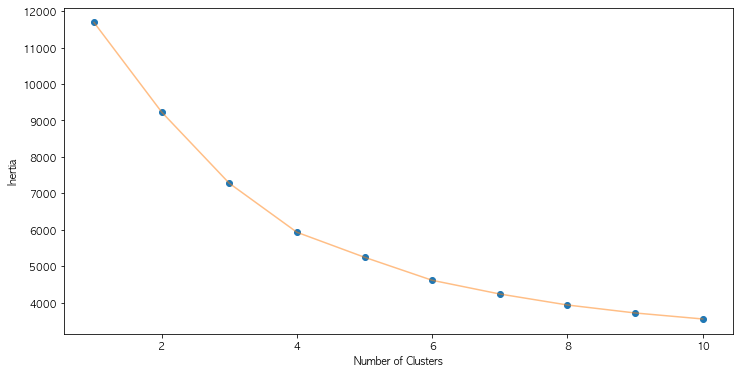

In [51]:
#스케일링 이후

change_n_clusters(k_range, scaled_encoding)

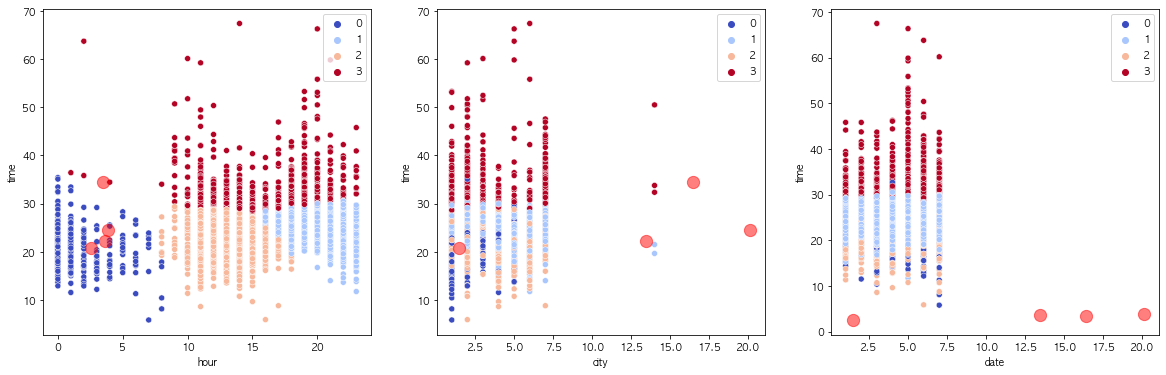

In [143]:
#스케일링 하지 않은 데이터, k=6시도
kmeans = KMeans(n_clusters=4)
kmeans.fit(encoding)

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='hour', y='time', data=encoding, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(132)
sns.scatterplot(x='city', y='time', data=encoding, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(133)
sns.scatterplot(x='date', y='time', data=encoding, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)


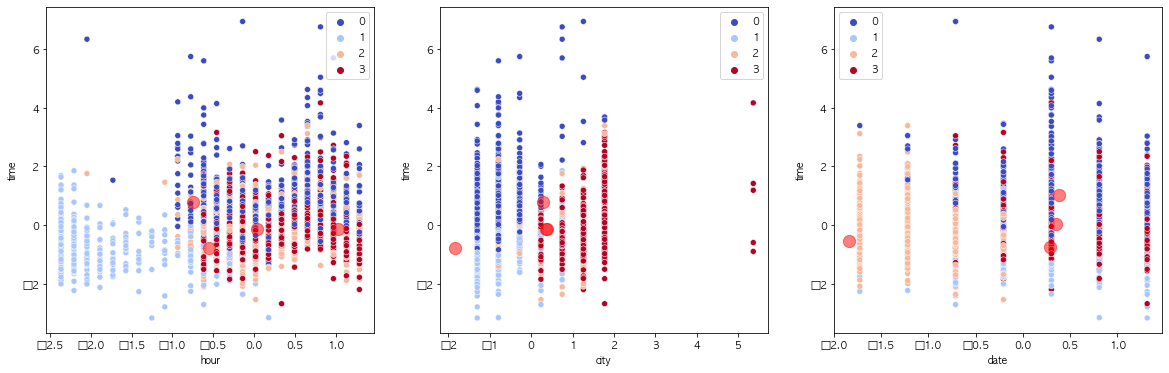

In [141]:
#스케일링 한 데이터, k=6시도
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_encoding)

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='hour', y='time', data=scaled_encoding, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(132)
sns.scatterplot(x='city', y='time', data=scaled_encoding, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(133)
sns.scatterplot(x='date', y='time', data=scaled_encoding, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)


# outlier 제거 + scaling한 데이터 클러스터링

In [82]:
del_outlier_df

,date,hour,city,time
0,2020-05-01,0,구로구,22.01
1,2020-05-01,0,금천구,16.45
2,2020-05-01,0,동작구,26.35
3,2020-05-01,0,영등포구,20.37
4,2020-05-01,0,은평구,21.76
...,...,...,...,...
2821,2020-05-31,23,금천구,17.93
2822,2020-05-31,23,도봉구,20.15
2823,2020-05-31,23,동작구,22.21
2824,2020-05-31,23,영등포구,29.67


In [83]:
#outlier 제거 + scaliscaled_encoding = pd.DataFrame(scaler.fit_transform(encoding), columns = encoding.columns)ng 하기 

#Mapping ordinal features
city_mapping = {
    '구로구': 0,
    '영등포구': 1,
    '동작구': 2,
    '구로구': 3,
    '은평구': 4,
    '금천구': 5,
    '도봉구': 6,
    '양천구':7,
    '관악구': 8,
    '노원구': 9,
    '강남구': 10,
    '강동구': 11,
    '서초구': 12,
    '서대문구': 13,
    '강서구': 14
}
del_outlier_df['city'] = del_outlier_df['city'].map(city_mapping)

#월요일(1), 화(2), 수(3), 목(4), 금(5), 토(6), 일(7) mapping 시키기

date_mapping = {
    '2020-05-04':1, '2020-05-11':1,'2020-05-25': 1,
    '2020-05-05':2,'2020-05-19':2,'2020-05-26':2,'2020-05-12': 2,
    '2020-05-20':3,'2020-05-13':3,'2020-05-06':3,'2020-05-27': 3,
    '2020-05-21':4,'2020-05-07':4,'2020-05-28':4,'2020-05-14': 4,
    '2020-05-15':5,'2020-05-01':5,'2020-05-22':5,'2020-05-08': 5,
    '2020-05-09':6,'2020-05-23':6,'2020-05-02':6,'2020-05-16':6,'2020-05-30':6,'2020-05-29': 6,
    '2020-05-03':7,'2020-05-10':7,'2020-05-17':7,'2020-05-24':7,'2020-05-31': 7
}
del_outlier_df['date'] = del_outlier_df['date'].map(date_mapping)

del_outlier_df

outlier_scaled_encoding = pd.DataFrame(scaler.fit_transform(del_outlier_df), columns = del_outlier_df.columns)


In [85]:
outlier_scaled_encoding

,date,hour,city,time
0,0.306501,-2.343766,-0.279531,-0.523892
1,0.306501,-2.343766,0.757154,-1.645287
2,0.306501,-2.343766,-0.797873,0.351442
3,0.306501,-2.343766,-1.316215,-0.854663
4,0.306501,-2.343766,0.238812,-0.574314
...,...,...,...,...
2821,1.314850,1.279497,0.757154,-1.346786
2822,1.314850,1.279497,1.275496,-0.899035
2823,1.314850,1.279497,-0.797873,-0.483554
2824,1.314850,1.279497,-1.316215,1.021052


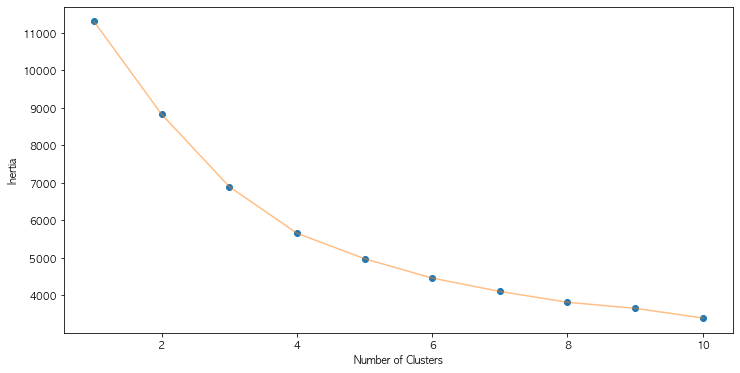

In [86]:
change_n_clusters(k_range, outlier_scaled_encoding)

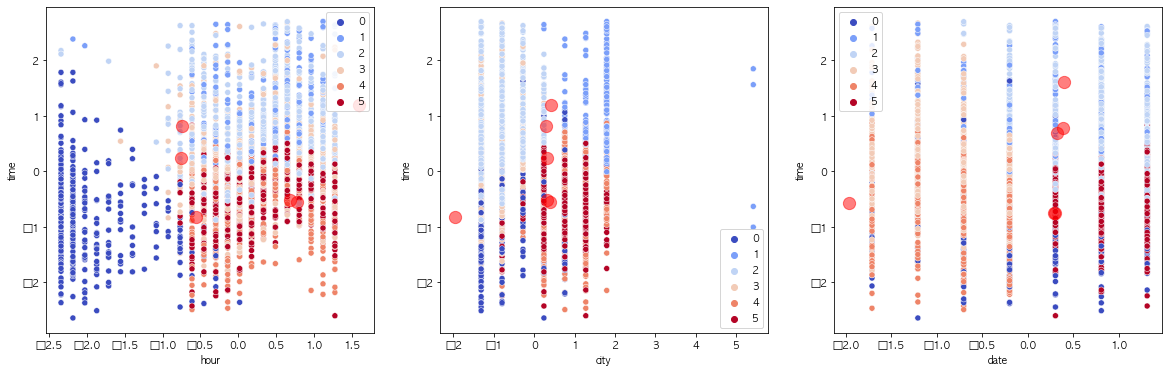

In [87]:
#outlier 제거 + 스케일링 한 데이터, k=6시도
kmeans = KMeans(n_clusters=6)
kmeans.fit(outlier_scaled_encoding)

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='hour', y='time', data=outlier_scaled_encoding, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(132)
sns.scatterplot(x='city', y='time', data=outlier_scaled_encoding, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(133)
sns.scatterplot(x='date', y='time', data=outlier_scaled_encoding, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)
